In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

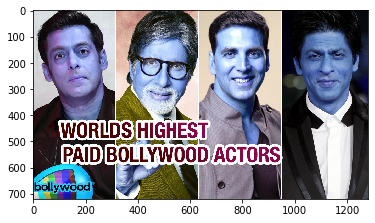

In [3]:
test_image = cv2.imread('image.jpg')# Read in the image using the imread function
plt.imshow(test_image)

In [4]:
type(test_image) ## Testing type of image 

numpy.ndarray

In [5]:
test_image.shape ## Testing size of array

(720, 1280, 3)

#### NOTE:
OpenCV and matplotlib have different orders of primary colors. Whereas OpenCV reads images in the form of BGR, matplotlib, on the other hand, follows the order of RGB. Thus, when we read a file through OpenCV, we read it as if it contains channels in the order of blue, green and red. However, when we display the image using matplotlib, the red and blue channel gets swapped and hence the blue tinge. To avoid this issue, we will transform the channel to how matplotlib expects it to be using the cvtColor function.

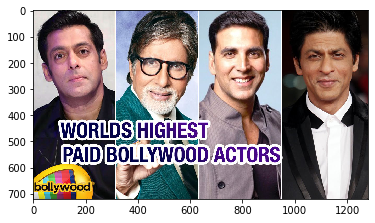

In [6]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [7]:
# Let us write a small function for that conversion.
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

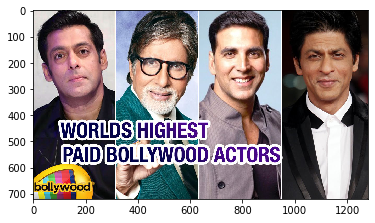

In [8]:
plt.imshow(convertToRGB(test_image))
##Passing image into above function and displaying

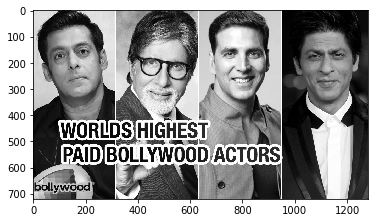

In [9]:
#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [10]:
test_image_gray.shape

(720, 1280)

In [11]:
### Savings images
#The images can be saved in the working directory as follows:

cv2.imwrite('final_image.png',test_image_gray)
# Where the final_image is the name of the image to be saved.

True

### Face Detection

In [12]:
haar_cascade_face = cv2.CascadeClassifier('E:\Machine Learning\Teaching ML_Data Analysis\Opencv\haarcascades\haarcascade_frontalface_default.xml')

In [13]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))


Faces found:  4


In [14]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 6)

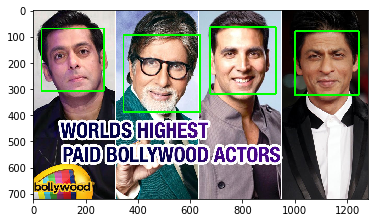

In [15]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Eye Detection

In [17]:
eye_cascade = cv2.CascadeClassifier('E:\Machine Learning\Teaching ML_Data Analysis\Opencv\haarcascades\haarcascade_eye.xml')

In [18]:
eyes = eye_cascade.detectMultiScale(test_image)
print('Eyees found: ', len(eyes))

Eyees found:  12


In [19]:
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 6)

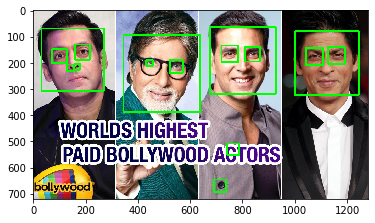

In [20]:
plt.imshow(convertToRGB(test_image))

### Smile detection

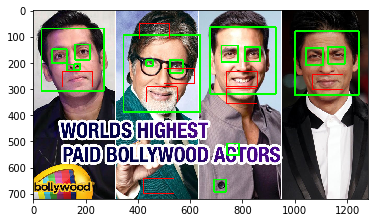

In [21]:
smile_cascade = cv2.CascadeClassifier('E:\Machine Learning\Teaching ML_Data Analysis\Opencv\haarcascades\haarcascade_smile.xml') 
smiles = smile_cascade.detectMultiScale(test_image, 1.8, 20)
for (sx, sy, sw, sh) in smiles: 
    cv2.rectangle(test_image, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 
plt.imshow(convertToRGB(test_image))

### Basic Operations in Opencv

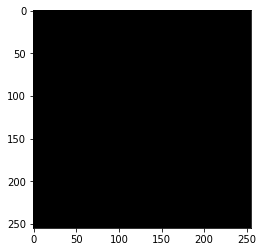

In [49]:
#Create a black image which will act as a template.
image_blank = np.zeros(shape=(255,255,3),dtype=np.int16)
#Display the black image.
plt.imshow(image_blank)

### Function & Attributes

## The generalised function for drawing shapes on images is:

cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)

* Image on which shapes are to be drawn
* co-ordinates of the shape to be drawn from Pt1(top left) to Pt2(bottom right)
* Color: The color of the shape that is to be drawn. It is passed as a tuple, eg: (255,0,0). For grayscale, it will be the scale of brightness.
* The thickness of the geometrical figure.

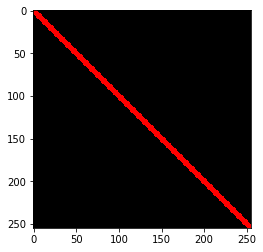

In [50]:
# Draw a diagonal red line with thickness of 5 px
# Drawing a straight line across an image requires specifying the points, through which the line will pass.
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

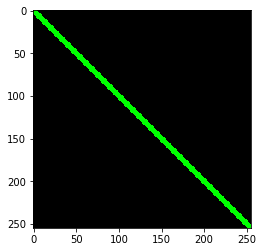

In [51]:
# Draw a diagonal green line with thickness of 5 px
line_green = cv2.line(image_blank,(0,0),(511,511),(0,255,0),5)
plt.imshow(line_green)

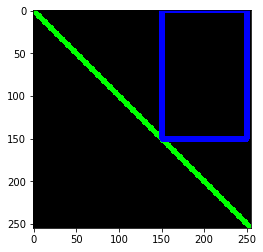

In [52]:
#Draw a blue rectangle with a thickness of 5 px
#For a rectangle, we need to specify the top left and the bottom right coordinates.

rectangle= cv2.rectangle(image_blank,(150,0),(250,150),(0,0,255),5)
plt.imshow(rectangle)

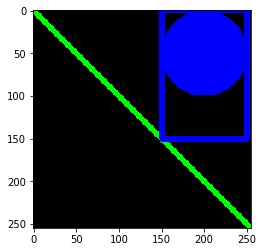

In [53]:
### Circle
## For a circle, we need to pass its center coordinates and 
## radius value. Let us draw a circle inside the rectangle drawn above
circle = cv2.circle(image_blank,(200,50), 50, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(circle)

#### Writing on Images
Adding text to images is also similar to drawing shapes on them. 
But you need to specify certain arguments before doing so:
Text to be writtencoordinates of the text. The text on an image begins from 
the bottom left direction.Font type and scale.Other attributes like color, 
thickness and line type. Normally the line type that is used is lineType = cv2.LINE_AA.

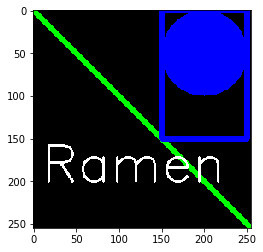

In [54]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(image_blank,'Ramen',(10,200), font,2,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)